In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Recordar obtener los URL "RAW" en Github

dataSet_url = "https://raw.githubusercontent.com/francopiria/Beer-Data-Science/main/beer_profile_and_ratings.csv"

In [59]:
df = pd.read_csv(dataSet_url, index_col=3)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3197 entries, Alaskan Brewing Co. Alaskan Amber to Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Description        3197 non-null   object 
 4   ABV                3197 non-null   float64
 5   Min IBU            3197 non-null   int64  
 6   Max IBU            3197 non-null   int64  
 7   Astringency        3197 non-null   int64  
 8   Body               3197 non-null   int64  
 9   Alcohol            3197 non-null   int64  
 10  Bitter             3197 non-null   int64  
 11  Sweet              3197 non-null   int64  
 12  Sour               3197 non-null   int64  
 13  Salty              3197 non-null   int64  
 14  Fruits             3197 non-null   int

In [60]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [25]:
# Calcular el número de reviews que corresponde al 5% más bajo
percentile_10 = int(0.10 * len(df))  # Obtener el 5% de las entradas

# Ordenar el DataFrame por el número de reviews y seleccionar el 5% más bajo
# sort_values ordena de menor a mayor segun la columna elegida!
lowest_reviews = df.sort_values('number_of_reviews').head(percentile_10)

print(percentile_10)
# print(lowest_reviews)

319


In [26]:
# Filtrar el DataFrame para quedarse con las entradas que tienen 5 o más reviews
df_filt = df.loc[df['number_of_reviews'] >= 5]

# Ver las primeras filas del DataFrame filtrado
print(df_filt.head(1))

# Ver cuantos tipos de cervezas hay
cantidad_styles = df["Style"].nunique()
print(cantidad_styles)

# Ver cual es el maximo numero de cervezas de un mismo tipo
print(df_filt['Style'].value_counts().max())

                                    Name    Style              Brewery  \
Beer Name (Full)                                                         
Alaskan Brewing Co. Alaskan Amber  Amber  Altbier  Alaskan Brewing Co.   

                                                                         Description  \
Beer Name (Full)                                                                       
Alaskan Brewing Co. Alaskan Amber  Notes:Richly malty and long on the palate, wit...   

                                   ABV  Min IBU  Max IBU  Astringency  Body  \
Beer Name (Full)                                                              
Alaskan Brewing Co. Alaskan Amber  5.3       25       50           13    32   

                                   Alcohol  ...  Fruits  Hoppy  Spices  Malty  \
Beer Name (Full)                            ...                                 
Alaskan Brewing Co. Alaskan Amber        9  ...      33     57       8    111   

                              

In [27]:
# Lista de columnas a redimensionar
columnas_redimensionar = ['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']

# Calculando los máximos para cada columna del DataFrame
maximos = df[columnas_redimensionar].max()

# Función para redimensionar los valores a la escala de 0 a 100
def redimensionar(valor, max_valor):
    nuevo_valor = (valor / max_valor) * 100
    return nuevo_valor

# Aplicamos la función de redimensionamiento a las columnas usando un bucle for
    
for columna in columnas_redimensionar:
    df_filt.loc[:, columna] = redimensionar(df[columna], maximos[columna])


# Visualizamos el DataFrame con las columnas redimensionadas
print(df_filt.head(2))

                                         Name    Style  \
Beer Name (Full)                                         
Alaskan Brewing Co. Alaskan Amber       Amber  Altbier   
Long Trail Brewing Co. Double Bag  Double Bag  Altbier   

                                                  Brewery  \
Beer Name (Full)                                            
Alaskan Brewing Co. Alaskan Amber     Alaskan Brewing Co.   
Long Trail Brewing Co. Double Bag  Long Trail Brewing Co.   

                                                                         Description  \
Beer Name (Full)                                                                       
Alaskan Brewing Co. Alaskan Amber  Notes:Richly malty and long on the palate, wit...   
Long Trail Brewing Co. Double Bag  Notes:This malty, full-bodied double alt is al...   

                                   ABV  Min IBU  Max IBU  Astringency  \
Beer Name (Full)                                                        
Alaskan Brewing Co. Ala

In [61]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, Alaskan Brewing Co. Alaskan Amber to Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2914 non-null   object 
 1   Style              2914 non-null   object 
 2   Brewery            2914 non-null   object 
 3   Description        2914 non-null   object 
 4   ABV                2914 non-null   float64
 5   Min IBU            2914 non-null   int64  
 6   Max IBU            2914 non-null   int64  
 7   Astringency        2914 non-null   float64
 8   Body               2914 non-null   float64
 9   Alcohol            2914 non-null   float64
 10  Bitter             2914 non-null   float64
 11  Sweet              2914 non-null   float64
 12  Sour               2914 non-null   float64
 13  Salty              2914 non-null   float64
 14  Fruits             2914 non-null   flo

In [62]:
df_filt.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,Mean_IBU
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,...,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,6.564973,21.669526,39.778655,20.991891,27.252280,12.755341,25.047129,23.023636,12.104628,2.169126,...,24.710100,10.285429,32.518817,3.640128,3.760354,3.661023,3.704017,3.748582,255.702471,30.724091
std,2.322085,13.132151,21.114357,12.695537,14.357607,12.573449,16.931481,12.759592,12.700146,4.530386,...,17.589411,13.061686,16.056342,0.494567,0.392839,0.439384,0.495410,0.430285,371.411327,16.505844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,5.000000,0.000000
25%,5.000000,15.000000,25.000000,12.345679,17.714286,5.035971,12.000000,13.403042,3.873239,0.000000,...,11.046512,2.717391,20.083682,3.428571,3.618477,3.474392,3.500000,3.580150,36.000000,21.500000
50%,6.000000,20.000000,35.000000,18.518519,23.428571,7.913669,21.333333,21.292776,8.098592,0.000000,...,20.348837,5.978261,31.380753,3.720871,3.833333,3.738636,3.791667,3.829607,113.000000,26.000000
75%,7.800000,25.000000,45.000000,27.160494,33.714286,16.546763,35.333333,30.038023,15.140845,2.083333,...,33.720930,13.043478,43.096234,3.967742,4.010766,3.950000,4.034640,4.029457,314.750000,37.500000
max,28.000000,65.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,4.723770,4.644231,4.633255,4.923077,4.807692,3290.000000,82.500000


In [28]:
# df_filt['Mean IBU'] = df_filt[['Min IBU', 'Max IBU']].mean(axis=1) (forma incorrecta sin LOC)

df_filt.loc[:, 'Mean_IBU'] = df_filt[['Min IBU', 'Max IBU']].mean(axis=1)
print(df_filt.head(1))

                                    Name    Style              Brewery  \
Beer Name (Full)                                                         
Alaskan Brewing Co. Alaskan Amber  Amber  Altbier  Alaskan Brewing Co.   

                                                                         Description  \
Beer Name (Full)                                                                       
Alaskan Brewing Co. Alaskan Amber  Notes:Richly malty and long on the palate, wit...   

                                   ABV  Min IBU  Max IBU  Astringency  \
Beer Name (Full)                                                        
Alaskan Brewing Co. Alaskan Amber  5.3       25       50    16.049383   

                                        Body  Alcohol  ...      Hoppy  \
Beer Name (Full)                                       ...              
Alaskan Brewing Co. Alaskan Amber  18.285714  6.47482  ...  33.139535   

                                     Spices      Malty  review_aroma  \


C:\Users\franc\AppData\Local\Temp\ipykernel_17972\1800319944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt.loc[:, 'Mean_IBU'] = df_filt[['Min IBU', 'Max IBU']].mean(axis=1)


In [30]:
score_variables = [
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "review_overall",
    "number_of_reviews"
]

descriptors_variables = [
    "Astringency",
    "Body",
    "Alcohol",
    "Bitter",
    "Sweet",
    "Sour",
    "Salty",
    "Fruits",
    "Hoppy",
    "Spices",
    "Malty"
]

otras_variables = [
    "ABV",
    "Mean_IBU"
]

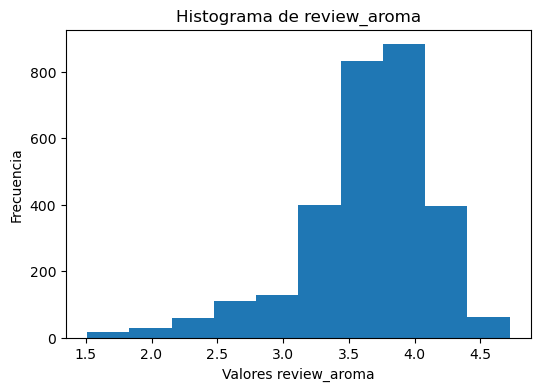

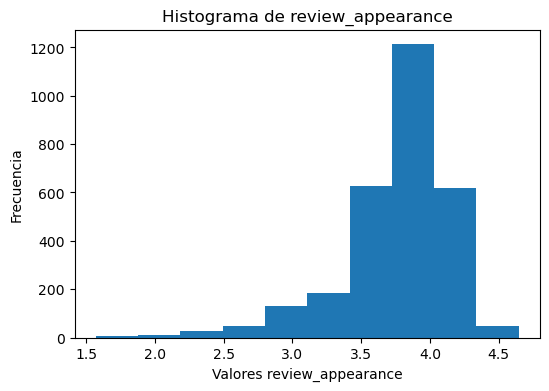

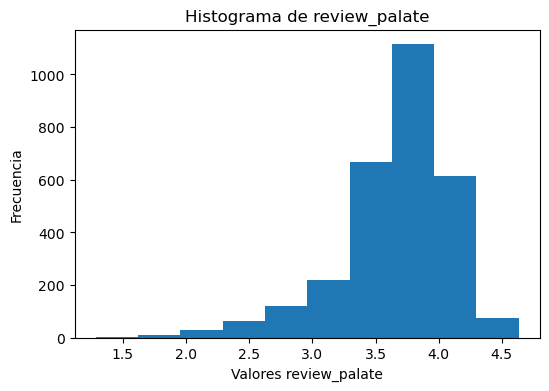

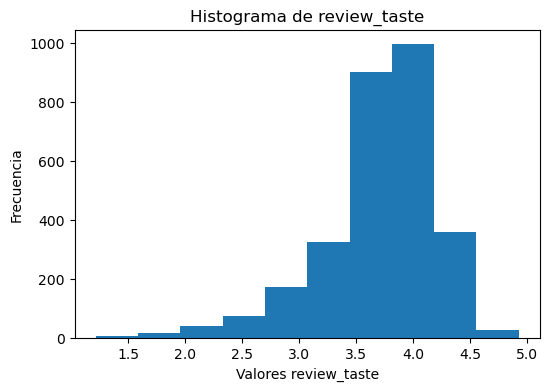

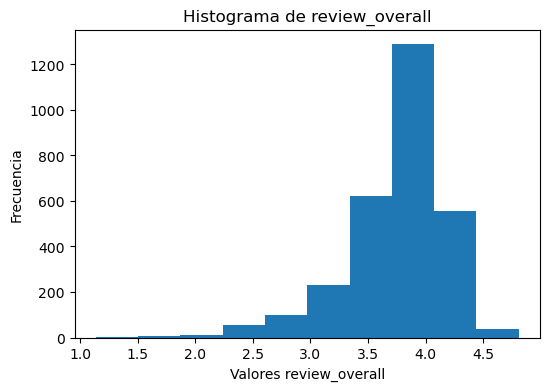

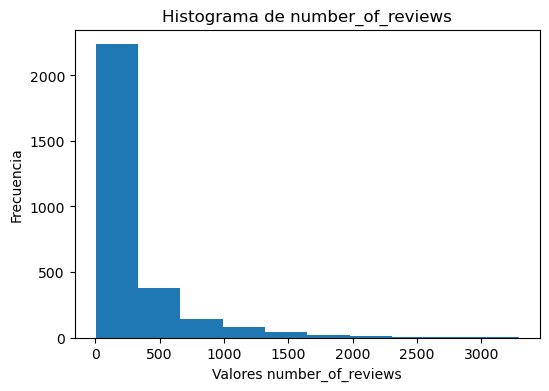

In [31]:
# Histogramas para evaluar la distribución de las variables de reviews

for columna in score_variables:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df_filt[columna])
    plt.xlabel(f'Valores {columna}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    plt.show()

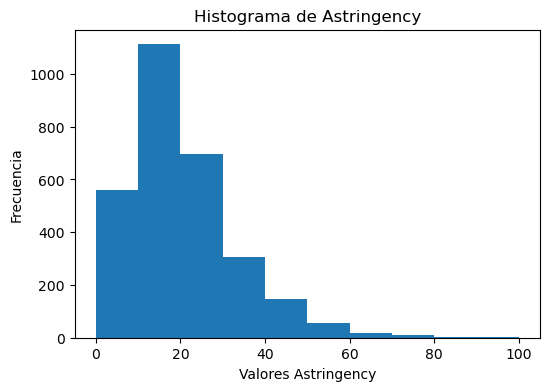

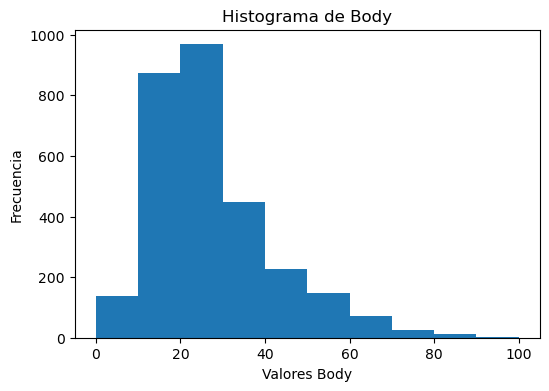

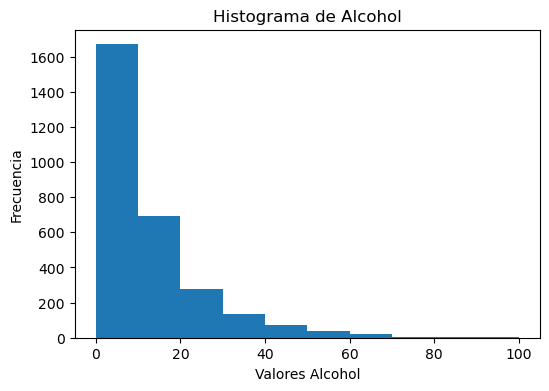

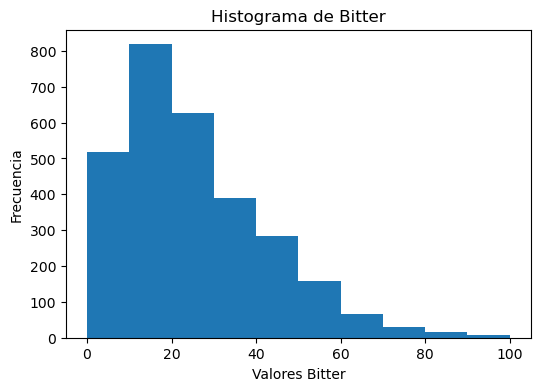

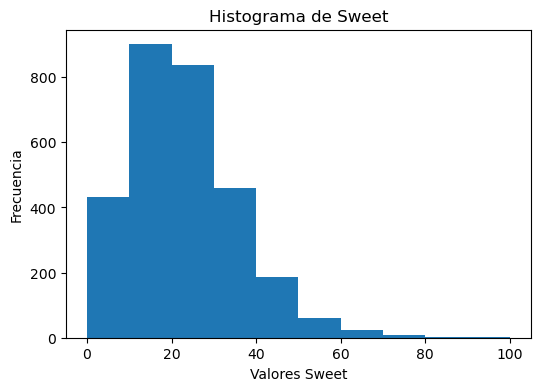

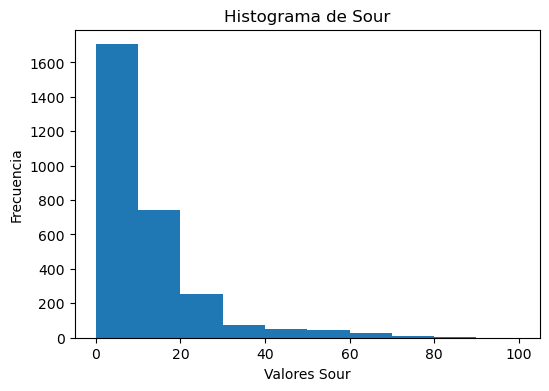

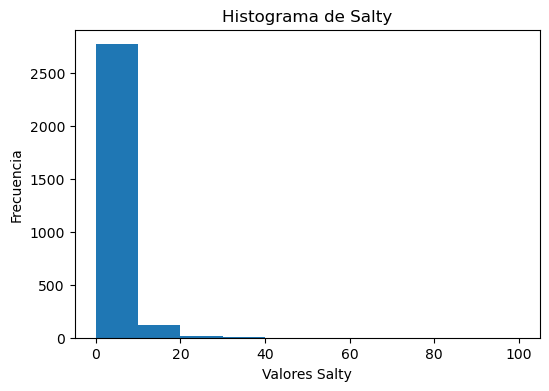

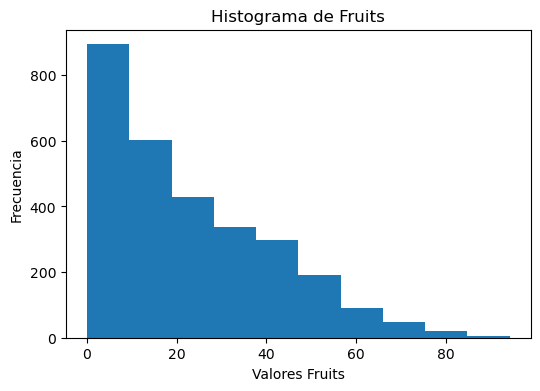

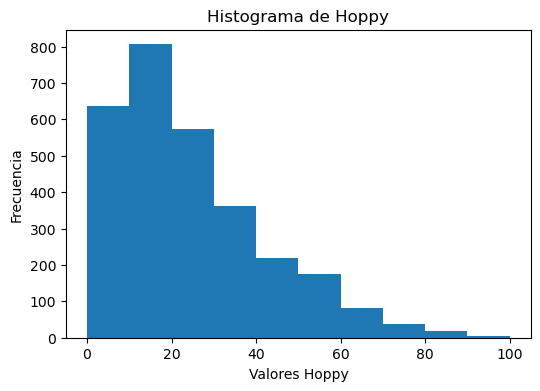

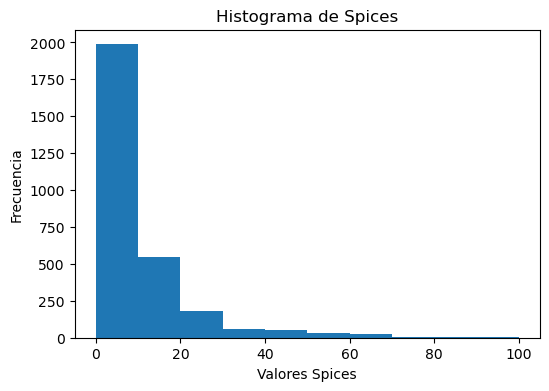

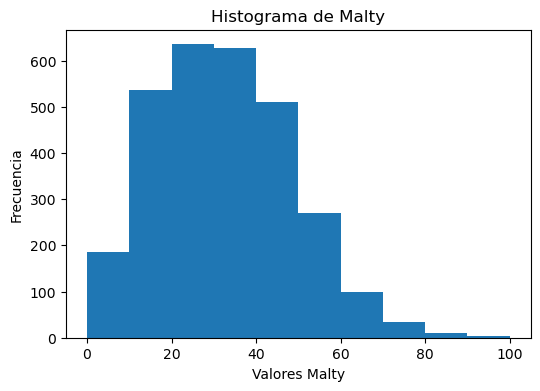

In [18]:
# Histogramas para evaluar la distribución de las variables de descriptores

for columna in descriptors_variables:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df_filt[columna])
    plt.xlabel(f'Valores {columna}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    plt.show()

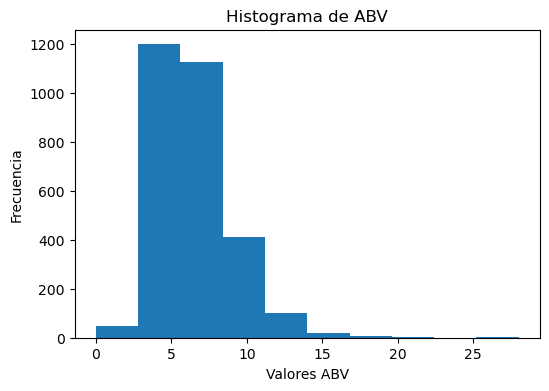

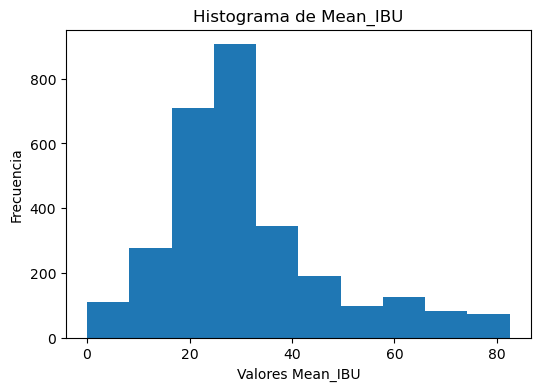

In [32]:
# Histogramas para evaluar la distribución de ABV e IBU

for columna in otras_variables:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df_filt[columna])
    plt.xlabel(f'Valores {columna}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    plt.show()

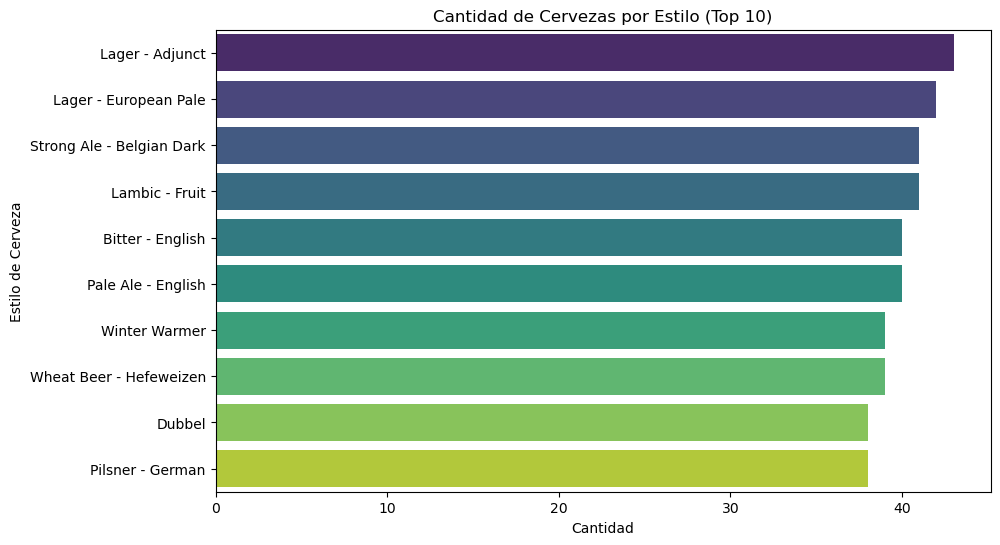

In [19]:
# Gráfico de barras de estilos de cerveza para evaluar cuales son las cervezas más producidas
plt.figure(figsize=(10, 6))
style_counts = df_filt['Style'].value_counts().head(10)  # Top 10 estilos más comunes
sns.barplot(x=style_counts.values, y=style_counts.index, palette='viridis')
plt.xlabel('Cantidad')
plt.ylabel('Estilo de Cerveza')
plt.title('Cantidad de Cervezas por Estilo (Top 10)')
plt.show()

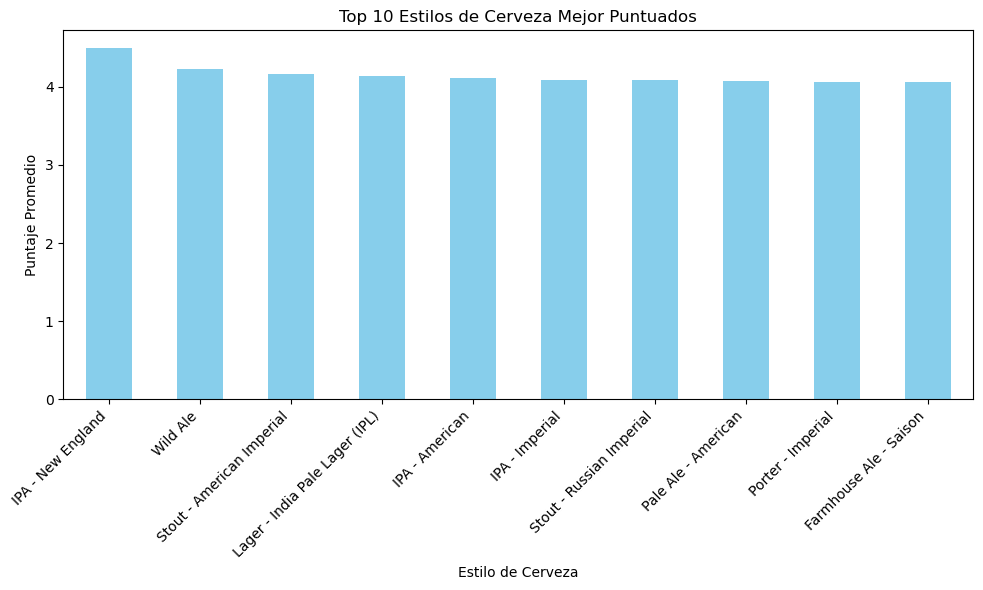

In [20]:
# Cervezas Mejor puntuadas

puntajes_promedio_por_estilo = df_filt.groupby('Style')['review_overall'].mean()
top_10_estilos = puntajes_promedio_por_estilo.nlargest(10)

plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
top_10_estilos.plot(kind='bar', color='skyblue')  # Crear el gráfico de barras
plt.title('Top 10 Estilos de Cerveza Mejor Puntuados')  # Título del gráfico
plt.xlabel('Estilo de Cerveza')  # Etiqueta del eje x
plt.ylabel('Puntaje Promedio')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico



#plt.figure(figsize=(10, 6))
#total_score = df['review_overall'].().head(10)  # Top 10 mejor puntuadas
#sns.barplot(x=total_score.values, y=total_score.index, palette='viridis')
#plt.xlabel('Total Score')
#plt.ylabel('Estilo de Cerveza')
#plt.title('Top 10 Mejores puntuadas')
#plt.show()

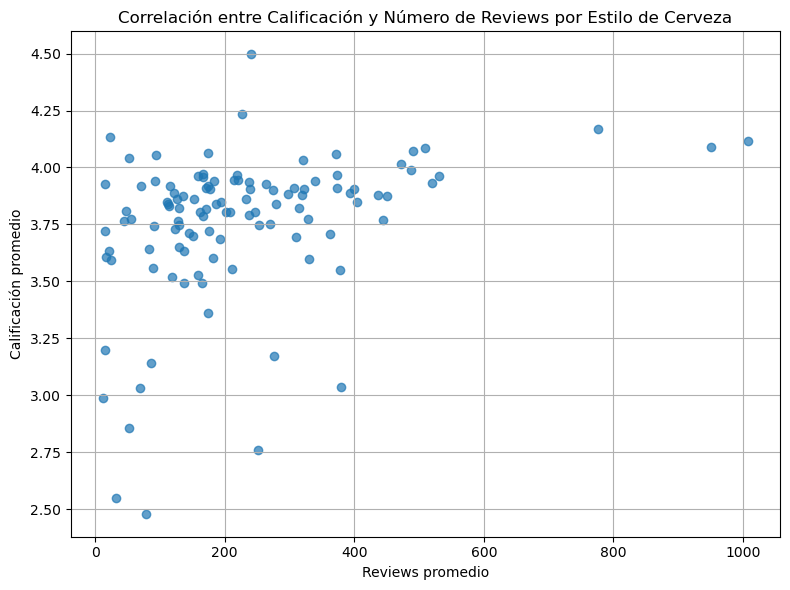

In [61]:
# 1. Calcular el promedio de review_overall y number_of_reviews por estilo de cerveza
promedio_review_overall = df_filt.groupby('Style')['review_overall'].mean()
promedio_number_of_reviews = df_filt.groupby('Style')['number_of_reviews'].mean()

# 2. Crear un DataFrame con los promedios calculados
promedios_df = pd.DataFrame({
    'Promedio Review Overall': promedio_review_overall,
    'Promedio Número de Reviews': promedio_number_of_reviews
})

# 3. Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Establecer el tamaño del gráfico
plt.scatter(promedios_df['Promedio Número de Reviews'], promedios_df['Promedio Review Overall'], alpha=0.7)
plt.title('Correlación entre Calificación y Número de Reviews por Estilo de Cerveza')
plt.xlabel('Reviews promedio')
plt.ylabel('Calificación promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

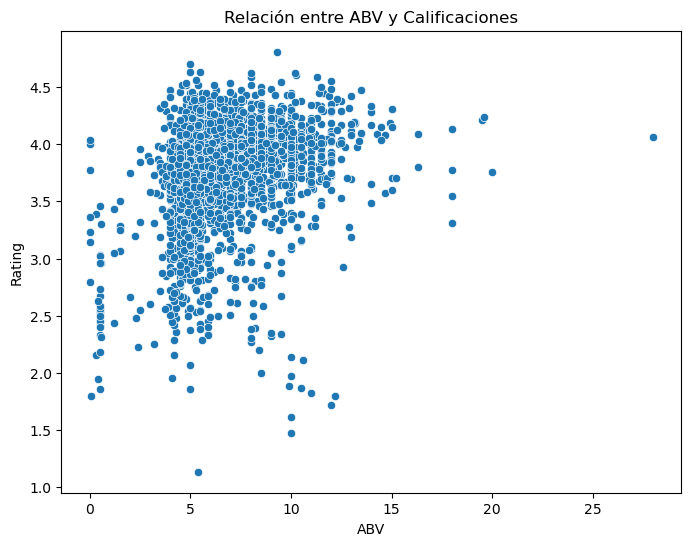

In [34]:
# Diagrama de dispersión ABV vs. calificaciones para evaluar correlación alcohol calificación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ABV', y='review_overall', data=df_filt)
plt.xlabel('ABV')
plt.ylabel('Rating')
plt.title('Relación entre ABV y Calificaciones')
plt.show()

# No parece haber correlación clara

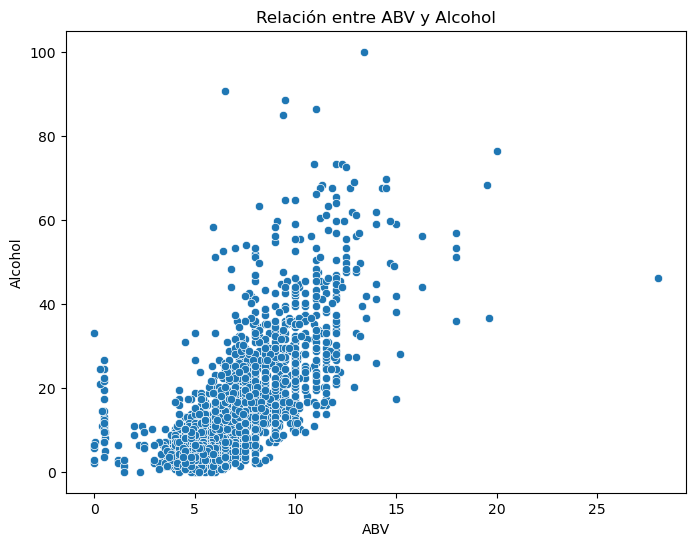

In [52]:
# Diagrama de dispersión ABV vs. Alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ABV', y='Alcohol', data=df_filt)
plt.xlabel('ABV')
plt.ylabel('Alcohol')
plt.title('Relación entre ABV y Alcohol')
plt.show()

# No parece haber correlación clara

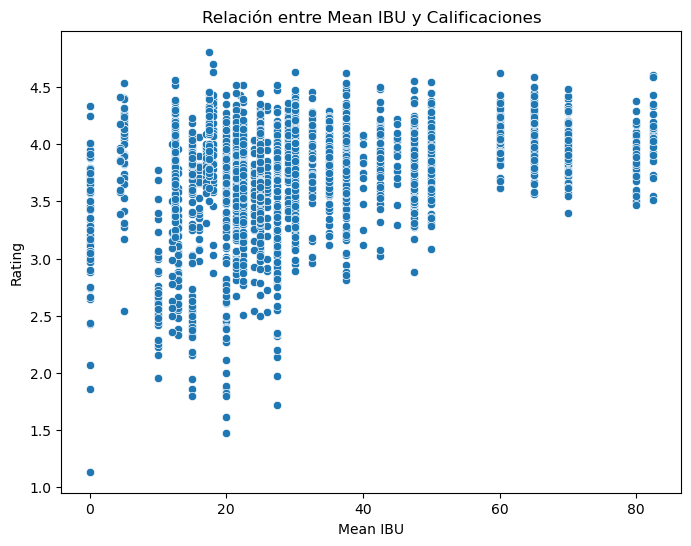

In [53]:
# Diagrama de dispersión IBU vs. calificaciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mean_IBU', y='review_overall', data=df_filt)
plt.xlabel('Mean IBU')
plt.ylabel('Rating')
plt.title('Relación entre Mean IBU y Calificaciones')
plt.show()

# Se ve que no hay cervezas de nota baja con alto amargor.
# Parece haber correlación entre el contenido de alcohol y las calificaciones
# Dentro de las de notas mas altas, hay de bajo y alto amargor


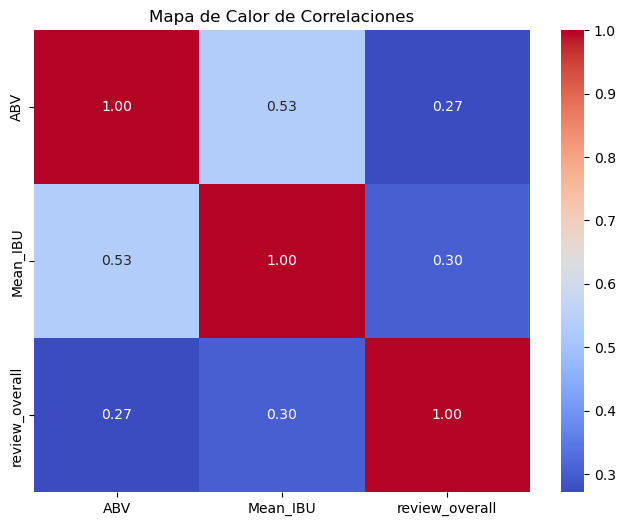

In [38]:
# Mapa de calor para correlaciones
plt.figure(figsize=(8, 6))
correlation_matrix = df_filt[['ABV', 'Mean_IBU', 'review_overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

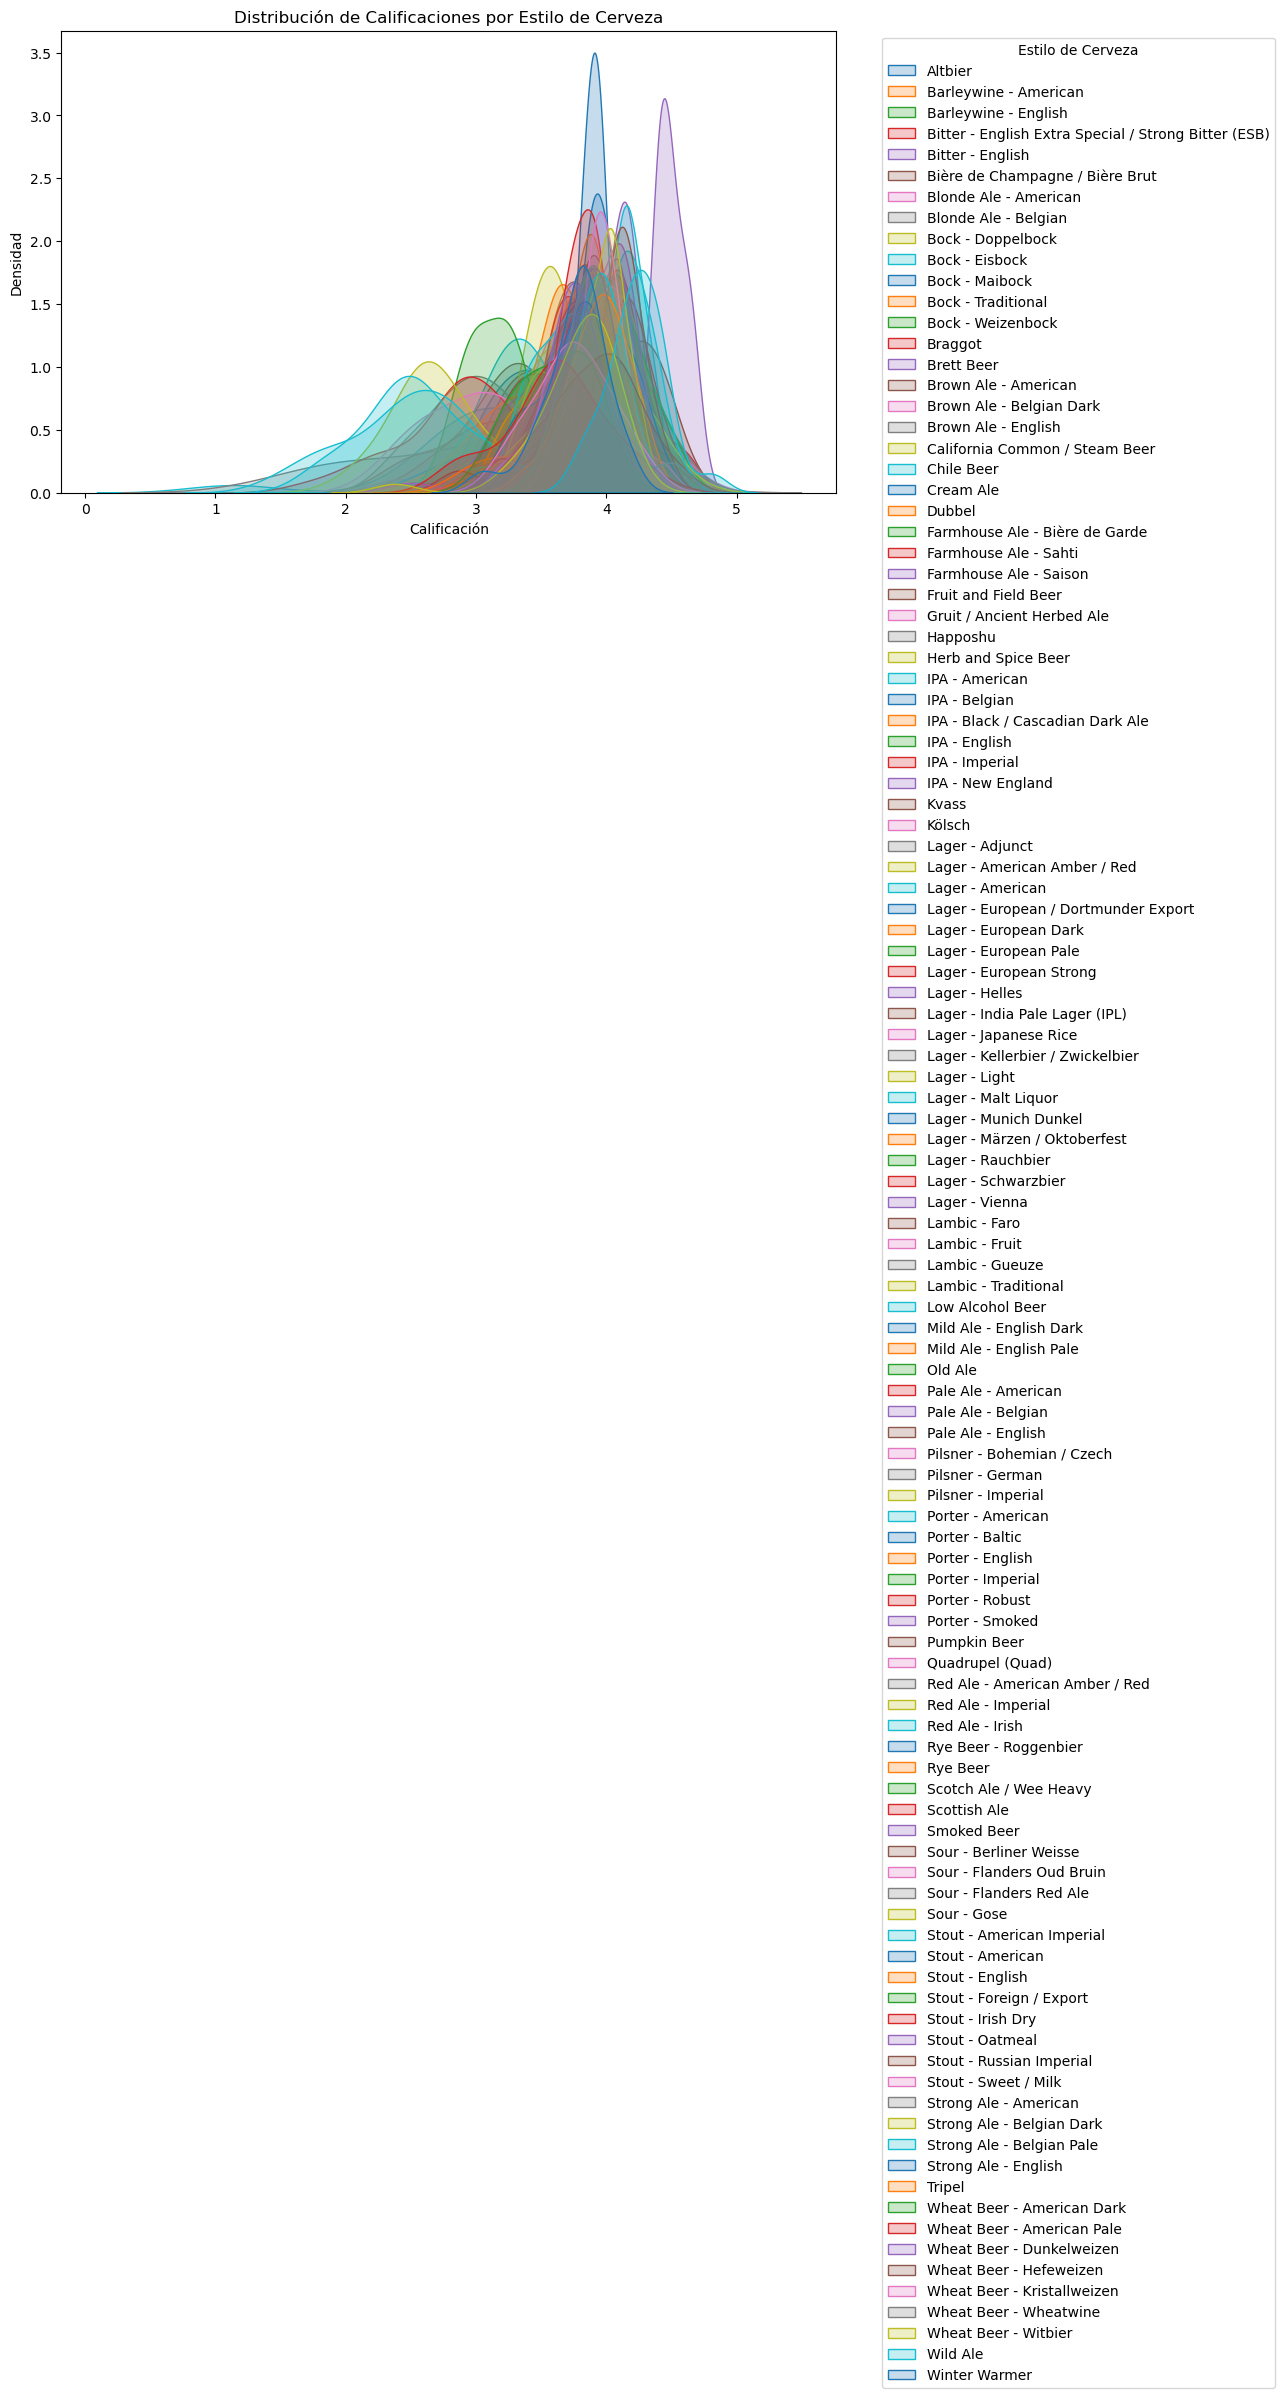

In [41]:
# Gráfico de densidad de calificaciones por estilo de cerveza

plt.figure(figsize=(10, 6))
for style in df_filt['Style'].unique():
    sns.kdeplot(data=df_filt[df_filt['Style'] == style]['review_overall'], label=style, fill=True, common_norm=False)
    
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Dificil de ver por ser tantos estilos
# Filtro el dataset para ver las mejores y las peores

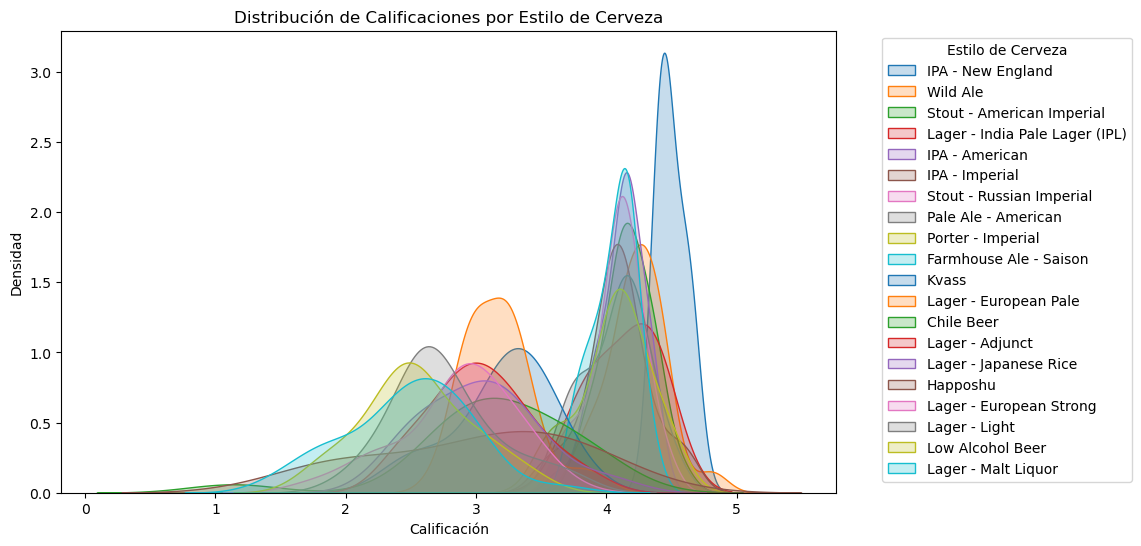

In [48]:
# Calcular la media de calificaciones por estilo de cerveza
mean_ratings = df_filt.groupby('Style')['review_overall'].mean().sort_values(ascending=False)

# Obtener los 10 estilos con las calificaciones más altas y más bajas
top_styles = mean_ratings.head(10).index.tolist()
bottom_styles = mean_ratings.tail(10).index.tolist()

# Filtrar el DataFrame para obtener los datos correspondientes a los estilos seleccionados
selected_styles = top_styles + bottom_styles
filtered_df = df_filt[df_filt['Style'].isin(selected_styles)]

# Gráfico de densidad para los estilos seleccionados
plt.figure(figsize=(10, 6))
for style in selected_styles:
    sns.kdeplot(data=filtered_df[filtered_df['Style'] == style]['review_overall'], label=style, fill=True)

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

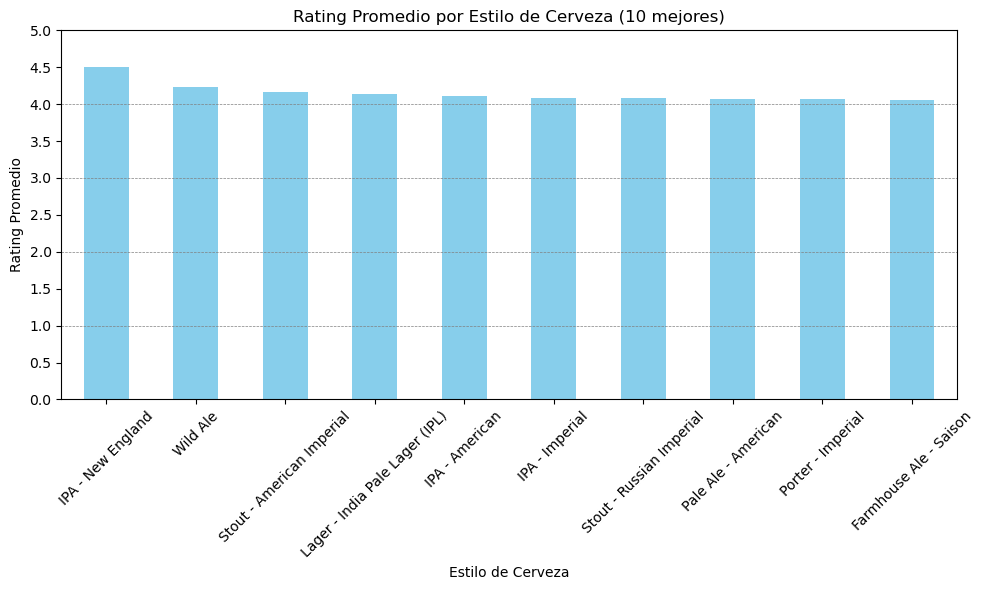

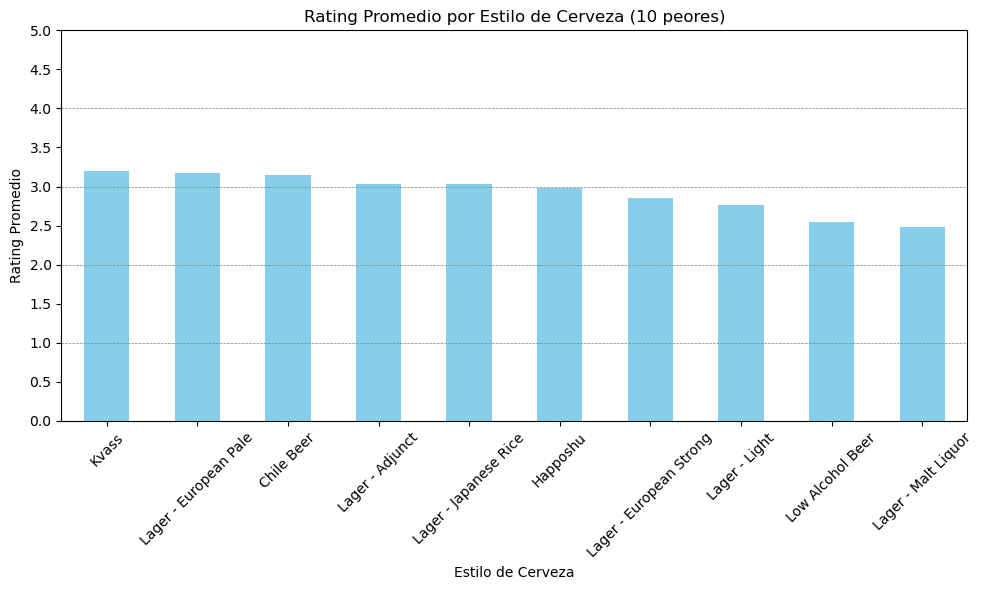

In [50]:
# Función para configurar las líneas punteadas horizontales
def configurar_lineas_punteadas():
    for y in range(0, 6, 1):
        plt.axhline(y, color='gray', linestyle='--', linewidth=0.5)

# Gráfico de barras para los estilos con las calificaciones más altas
plt.figure(figsize=(10, 6))
mean_ratings[top_styles].plot(kind='bar', color='skyblue')
plt.xlabel('Estilo de Cerveza')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio por Estilo de Cerveza (10 mejores)')
plt.ylim(0, 5)  # Establecer límites del eje y
plt.yticks([i * 0.5 for i in range(11)])  # Establecer ticks del eje y de 0 a 5 de a 0.5
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
configurar_lineas_punteadas()  # Agregar líneas punteadas horizontales
plt.tight_layout()
plt.show()

# Gráfico de barras para los estilos con las calificaciones más bajas
plt.figure(figsize=(10, 6))
mean_ratings[bottom_styles].plot(kind='bar', color='skyblue')
plt.xlabel('Estilo de Cerveza')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio por Estilo de Cerveza (10 peores)')
plt.ylim(0, 5)  # Establecer límites del eje y
plt.yticks([i * 0.5 for i in range(11)])  # Establecer ticks del eje y de 0 a 5 de a 0.5
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
configurar_lineas_punteadas()  # Agregar líneas punteadas horizontales
plt.tight_layout()
plt.show()

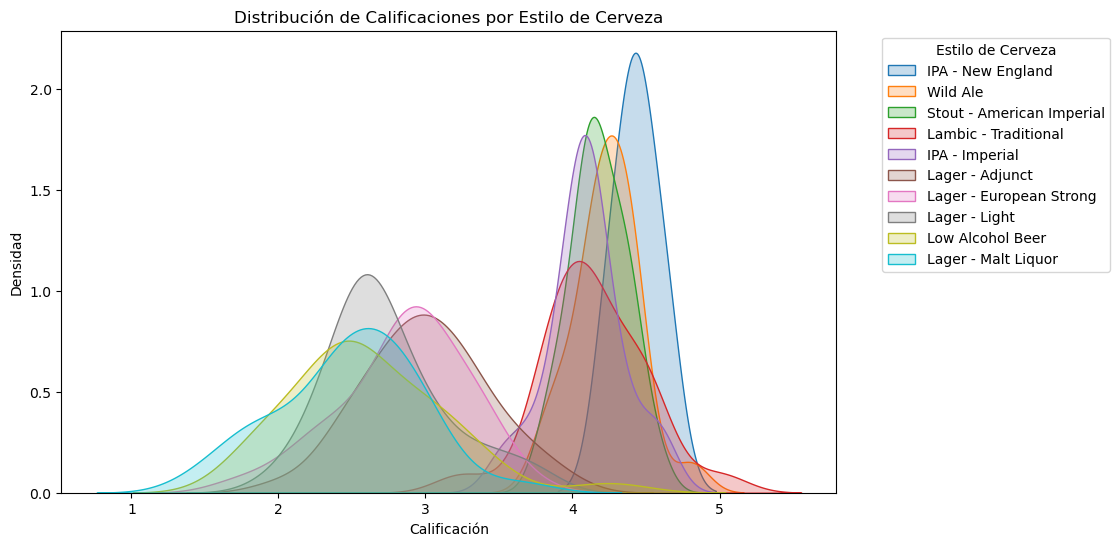

In [51]:
# Calcular la media de calificaciones por estilo de cerveza
mean_ratings = df.groupby('Style')['review_overall'].mean().sort_values(ascending=False)

# Obtener los 5 estilos con las calificaciones más altas y más bajas
top_styles = mean_ratings.head(5).index.tolist()
bottom_styles = mean_ratings.tail(5).index.tolist()

# Filtrar el DataFrame para obtener los datos correspondientes a los estilos seleccionados
selected_styles = top_styles + bottom_styles
filtered_df = df[df['Style'].isin(selected_styles)]

# Gráfico de densidad para los estilos seleccionados
plt.figure(figsize=(10, 6))
for style in selected_styles:
    sns.kdeplot(data=filtered_df[filtered_df['Style'] == style]['review_overall'], label=style, fill=True)

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()